In [1]:
## Carga librerías


## Tratamiento de datos
##----------------------------------------------------------------
import pandas as pd
import numpy as np

import missingno as msno 

import pandas_profiling as pp

## Visualización de datos
##----------------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Carga del dataset

df = pd.read_csv('mwc22-client_table.csv', sep = ',')

# Check first line
df.head()

# Check last line
#df.tail()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,"67,25","201,75",0
1,24321859,2,"58,33",350,0
2,24321880,3,"46,67",112,0
3,24321957,2,50,600,0
4,24321962,4,10,120,0


In [3]:
# En la información general se pueden ver la cantidad de líneas que tiene el documento y el formato de dato de cada
# una de las columnas, donde se encuentran dos tipos. También se puede observar que no hay datos nulos. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLIENT ID               35884 non-null  int64 
 1   CLIENT_SEGMENT          35884 non-null  int64 
 2   AVG CONSO               35884 non-null  object
 3   AVG BASKET SIZE         35884 non-null  object
 4   RECEIVED_COMMUNICATION  35884 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [4]:
# Como se ha visto en la información, los números decimales se consideran objetos, se deben convertir a valor "float"
# para poder trabajar con ellos. 

# Para poder convertir los valores a "float" previamente hay que substituir las "," por ".".
df["AVG CONSO"] = (df["AVG CONSO"]
                         .str.extract(r"([\d,\.]+)", expand=False)
                         .str.replace(",", ".")
                         .astype(float))

df["AVG BASKET SIZE"] = (df["AVG BASKET SIZE"]
                         .str.extract(r"([\d,\.]+)", expand=False)
                         .str.replace(",", ".")
                         .astype(float))

# A continuación se transforman los datos de las columnas al formato "float".

df["AVG CONSO"] = (df["AVG CONSO"].astype(float))
df["AVG BASKET SIZE"] = (df["AVG BASKET SIZE"].astype(float))

In [6]:
# Se agrufa el consumo medio por segmento y se guardan los datos en dos listas.
grouped = df.groupby("CLIENT_SEGMENT")
lista_grupo = []
lista_avg_conso = []
for name, group in grouped:
    lista_grupo.append(name)
    lista_avg_conso.append(np.mean(group["AVG CONSO"]))

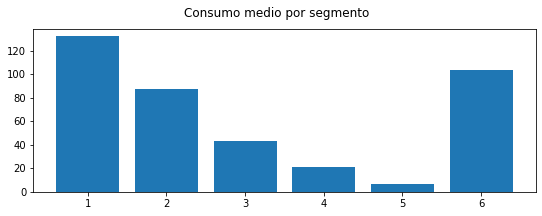

In [7]:
# Se representa con un gráfico de barras el consumo medio por segmento.
plt.figure(figsize=(9, 3))
plt.bar(lista_grupo, lista_avg_conso)
plt.suptitle('Consumo medio por segmento')
plt.show()

In [8]:
# Se agrupa el tamaño medio de la cesta por segmento y se guardan los datos en dos listas.
grouped2 = df.groupby("CLIENT_SEGMENT")
lista_grupo_2 = []
lista_avg_basket = []
for name, group in grouped2:
    lista_grupo_2.append(name)
    lista_avg_basket.append(np.mean(group["AVG BASKET SIZE"]))

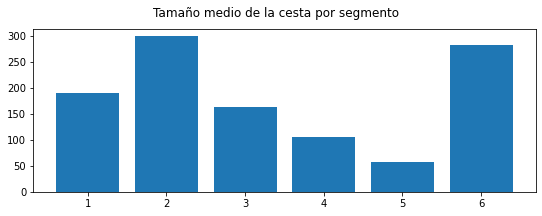

In [9]:
# Se representa con un gráfico de barras el tamaño medio de la cesta por segmento.
plt.figure(figsize=(9, 3))
plt.bar(lista_grupo_2, lista_avg_basket)
plt.suptitle('Tamaño medio de la cesta por segmento')
plt.show()

In [10]:
# En general se puede observar que a mayor tamaño medio de la cesta, mayor consumo de producto. 

In [11]:
# Se agrufa el consumo medio por segmento y se guardan los datos en dos listas.
grouped3 = df.groupby("RECEIVED_COMMUNICATION")
lista_grupo_3 = []
lista_avg_conso_promo = []
for name, group in grouped3:
    lista_grupo_3.append(name)
    lista_avg_conso_promo.append(np.mean(group["AVG CONSO"]))

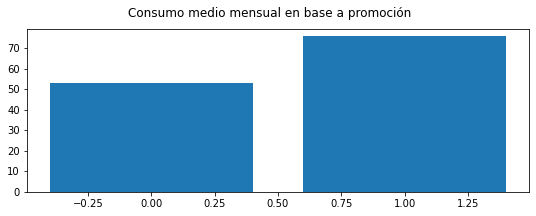

In [12]:
# Se representa con un gráfico de barras el consumo medio mensual en función de si el cliente recibio promoción de sus
# productos.
plt.figure(figsize=(9, 3))
plt.bar(lista_grupo_3, lista_avg_conso_promo)
plt.suptitle('Consumo medio mensual en base a promoción')
plt.show()

In [13]:
# Se puede observar que los clientes con promoción han consumido mayor cantidad de fruta.

In [14]:
# Ahora se procederá a analizar los datos del dataset "mwc22-orders_table" con el objetivo de conocer cuales son las
# frutas más consumidas por cada segmento. 

# Primero se cargan los datos en un dataframe y se observa que se carguen correctamente.

df2 = pd.read_csv('mwc22-orders_table.csv', sep = ',')

# Check primeras líneas.
df2.head()

# Check últimas líneas
#df2.tail()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


In [15]:
# En la información general se pueden ver la cantidad de líneas que tiene el documento y el formato de dato de cada
# una de las columnas, donde se encuentran dos tipos. También se puede observar que no hay datos nulos. 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CLIENT ID      66912 non-null  int64 
 1   NB PRODS       66912 non-null  int64 
 2   ORDER ID       66912 non-null  int64 
 3   FRUIT_PRODUCT  66912 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [16]:
# Se realiza la unión del dataframe cliente con el dataframde de las órdenes, con la intención de ver que frutas se consumen más
# en cada segmento.
df3 = pd.merge(df, df2, how='inner')
df3.head()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,24321771,6,67.25,201.75,0,2,676480593,Lemon
1,24321880,3,46.67,112.00,0,10,668762140,Orange
2,24321957,2,50.00,600.00,0,20,667332821,Apricot
3,24321957,2,50.00,600.00,0,20,667332821,Orange
4,24322170,1,116.67,200.00,0,5,668261888,Lemon


In [17]:
# Primeo se filtran los datos por segmento y posteriormente por tipo de fruta, para así sumar la cantidad de unidades de cada
# fruta. Primero se extraeran los datos y posteriormente se presentarán los gráficos conjuntamente para facilitar su lectura.

#En este punto se extraen los datos del segmento 1

grouped1 = df3[(df3.CLIENT_SEGMENT == 1)]
grouped1_f = grouped1.groupby(["FRUIT_PRODUCT"])                       
lista_frutas_1 = []
lista_cantidad_1 = []
for name, group in grouped1_f:
    lista_frutas_1.append(name)
    lista_cantidad_1.append(np.sum(group["NB PRODS"]))
    
#En este punto se extraen los datos del segmento 2

grouped2 = df3[(df3.CLIENT_SEGMENT == 2)]
grouped2_f = grouped2.groupby(["FRUIT_PRODUCT"])                       
lista_frutas_2 = []
lista_cantidad_2 = []
for name, group in grouped2_f:
    lista_frutas_2.append(name)
    lista_cantidad_2.append(np.sum(group["NB PRODS"]))

#En este punto se extraen los datos del segmento 3

grouped3 = df3[(df3.CLIENT_SEGMENT == 3)]
grouped3_f = grouped3.groupby(["FRUIT_PRODUCT"])                       
lista_frutas_3 = []
lista_cantidad_3 = []
for name, group in grouped3_f:
    lista_frutas_3.append(name)
    lista_cantidad_3.append(np.sum(group["NB PRODS"]))
    
#En este punto se extraen los datos del segmento 4

grouped4 = df3[(df3.CLIENT_SEGMENT == 4)]
grouped4_f = grouped4.groupby(["FRUIT_PRODUCT"])                       
lista_frutas_4 = []
lista_cantidad_4 = []
for name, group in grouped4_f:
    lista_frutas_4.append(name)
    lista_cantidad_4.append(np.sum(group["NB PRODS"]))

#En este punto se extraen los datos del segmento 5

grouped5 = df3[(df3.CLIENT_SEGMENT == 5)]
grouped5_f = grouped5.groupby(["FRUIT_PRODUCT"])                       
lista_frutas_5 = []
lista_cantidad_5 = []
for name, group in grouped5_f:
    lista_frutas_5.append(name)
    lista_cantidad_5.append(np.sum(group["NB PRODS"]))

#En este punto se extraen los datos del segmento 6

grouped6 = df3[(df3.CLIENT_SEGMENT == 6)]
grouped6_f = grouped6.groupby(["FRUIT_PRODUCT"])                       
lista_frutas_6 = []
lista_cantidad_6 = []
for name, group in grouped6_f:
    lista_frutas_6.append(name)
    lista_cantidad_6.append(np.sum(group["NB PRODS"]))

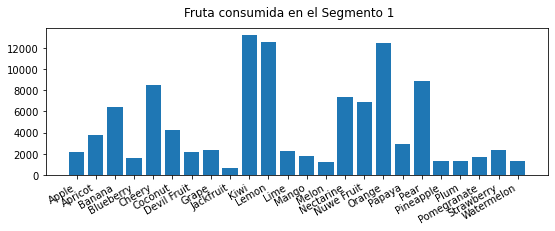

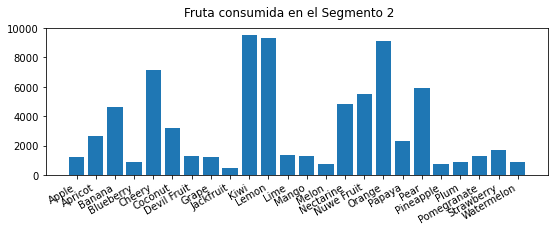

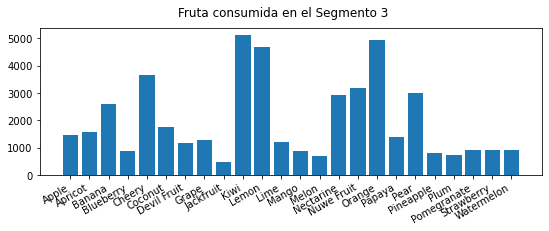

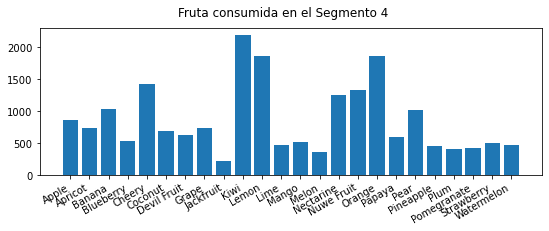

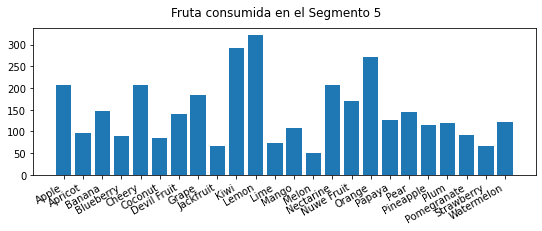

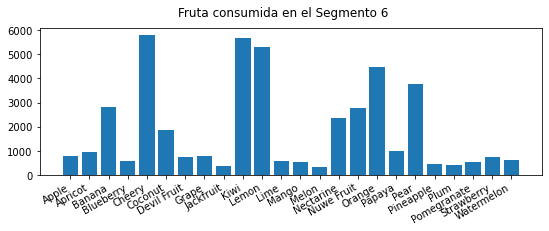

In [18]:
# Se muestra el gráfico de barras de la fruta consumida en el segmento 1.
fig = plt.figure(figsize=(9, 3))
plt.bar(lista_frutas_1, lista_cantidad_1)
plt.suptitle('Fruta consumida en el Segmento 1')
fig.autofmt_xdate()
plt.show()

# Se muestra el gráfico de barras de la fruta consumida en el segmento 2.
fig = plt.figure(figsize=(9, 3))
plt.bar(lista_frutas_2, lista_cantidad_2)
plt.suptitle('Fruta consumida en el Segmento 2')
fig.autofmt_xdate()
plt.show()

# Se muestra el gráfico de barras de la fruta consumida en el segmento 3.
fig = plt.figure(figsize=(9, 3))
plt.bar(lista_frutas_3, lista_cantidad_3)
plt.suptitle('Fruta consumida en el Segmento 3')
fig.autofmt_xdate()
plt.show()

# Se muestra el gráfico de barras de la fruta consumida en el segmento 4.
fig = plt.figure(figsize=(9, 3))
plt.bar(lista_frutas_4, lista_cantidad_4)
plt.suptitle('Fruta consumida en el Segmento 4')
fig.autofmt_xdate()
plt.show()

# Se muestra el gráfico de barras de la fruta consumida en el segmento 5.
fig = plt.figure(figsize=(9, 3))
plt.bar(lista_frutas_5, lista_cantidad_5)
plt.suptitle('Fruta consumida en el Segmento 5')
fig.autofmt_xdate()
plt.show()

# Se muestra el gráfico de barras de la fruta consumida en el segmento 6.
fig = plt.figure(figsize=(9, 3))
plt.bar(lista_frutas_6, lista_cantidad_6)
plt.suptitle('Fruta consumida en el Segmento 6')
fig.autofmt_xdate()
plt.show()

In [ ]:
# Se puede observar que el kiwi y el limón generalmente son los productos más consumidos en todos los segmentos.
# También se puede ver una relación entre el consumo medio del primer gráfico realizado en este ejercicio con las cantidades
# de producto consumidas.

In [ ]:
# A continuación se procede con los casos de predicción. Se proponen dos tipos de módelos y se analizará cual da
# mejor resultado, se tiene en cuenta una separación de los datos con "train_test_split" para conseguir una predicción lo
# más certera posible.

In [19]:
# Primer caso, Multinomial Naive Bayes.

column_names = ['AVG CONSO','AVG BASKET SIZE','RECEIVED_COMMUNICATION']

X = df[column_names]
y = df['CLIENT_SEGMENT']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, train_size=0.7)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(MultinomialNB())

model.fit(Xtrain, ytrain)
prediction = model.predict(Xtest)


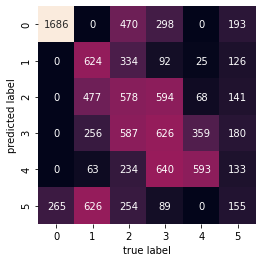

In [20]:
# Se analiza el resultado con una matriz.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');




In [21]:
# Segundo caso Random Forest Classifier.

column_names = ['AVG CONSO','AVG BASKET SIZE','RECEIVED_COMMUNICATION']

X = df[column_names]
y = df['CLIENT_SEGMENT']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, train_size=0.7)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000)
forest.fit(Xtrain, ytrain)
prediction = forest.predict(Xtest)

              precision    recall  f1-score   support

           1       0.91      0.87      0.89      2060
           2       0.92      0.79      0.85      2366
           3       0.79      0.75      0.77      2589
           4       0.74      0.75      0.75      2317
           5       0.84      0.72      0.77      1220
           6       0.06      0.28      0.10       214

    accuracy                           0.77     10766
   macro avg       0.71      0.69      0.69     10766
weighted avg       0.82      0.77      0.79     10766



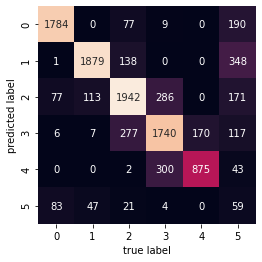

In [22]:
# Se analiza el restulado con un reporte y una matriz.
from sklearn import metrics
print(metrics.classification_report(prediction, ytest))

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
# Conclusión sobre los casos de predicción. Se puede observar como Random Forest Classifier ofrece una predicción
# con mejores resultados, sin emargo no es capaz de detectar adecuadamente el segmento número 6.

In [23]:
# Ahose se cargará el excel con los datos a predecir.

df4 = pd.read_csv('mwc22-client_table+-+test_x.csv', sep = ',')

# Check primeras líneas.
df4.head()

# Check últimas líneas
#df2.tail()

,CLIENT ID,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,48352078,"8,33",100,0
1,18072186,"93,42","186,83",1
2,48352246,"45,83","137,5",0
3,18070621,"16,67",200,1
4,48352262,"13,33",160,0


In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLIENT ID               19 non-null     int64 
 1   AVG CONSO               19 non-null     object
 2   AVG BASKET SIZE         19 non-null     object
 3   RECEIVED_COMMUNICATION  19 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 736.0+ bytes


In [25]:
# Como se ha visto en la información, los números decimales se consideran objetos, se deben convertir a valor "float"
# para poder trabajar con ellos. 

# Para poder convertir los valores a "float" previamente hay que substituir las "," por ".".
df4["AVG CONSO"] = (df4["AVG CONSO"]
                         .str.extract(r"([\d,\.]+)", expand=False)
                         .str.replace(",", ".")
                         .astype(float))

df4["AVG BASKET SIZE"] = (df4["AVG BASKET SIZE"]
                         .str.extract(r"([\d,\.]+)", expand=False)
                         .str.replace(",", ".")
                         .astype(float))

# A continuación se transforman los datos de las columnas al formato "float".

df4["AVG CONSO"] = (df4["AVG CONSO"].astype(float))
df4["AVG BASKET SIZE"] = (df4["AVG BASKET SIZE"].astype(float))

In [27]:
# Se ejecuta la predicción y se genera una nueva columna en el dataframe para ubicar los resultados. 
column_names = ['AVG CONSO','AVG BASKET SIZE','RECEIVED_COMMUNICATION']

X = df[column_names]
y = df['CLIENT_SEGMENT']

X2 = df4[column_names]

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000)
forest.fit(X, y)
df4['CLIENT_SEGMENT'] = forest.predict(X2)

In [28]:
# A continuación se pueden ver los resultados. 
df4.head(n= 25)

,CLIENT ID,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION,CLIENT_SEGMENT
0,48352078,8.33,100.00,0,4
1,18072186,93.42,186.83,1,1
2,48352246,45.83,137.50,0,3
3,18070621,16.67,200.00,1,4
4,48352262,13.33,160.00,0,4
5,48359553,16.67,200.00,0,4
6,18071647,8.33,100.00,1,4
7,48359574,54.17,162.50,0,3
8,48359627,26.67,106.67,0,4
9,18070505,166.67,333.33,1,1


In [29]:
# Se convierten las columnas deseadas en un archivo csv.

selected_columns = df4[["CLIENT ID","CLIENT_SEGMENT"]]
df5 = selected_columns.copy()
df5.head()
df5.to_csv('results.csv')